# Introduction to Data Optimization - Data Cleaning


# Basic Data Cleaning

* How to identify and remove column variables that only have a single value.
* How to identify and consider column variables with very few unique values.
* How to identify and remove rows that contain duplicate observations.

## Identify Columns that Contain a Single Value

* Columns that have a single observation or value are probably useless for modeling.
* These columns or predictors are referred to zero-variance predictors as if we measured the variance (average value from the mean), it would be zero.

In [1]:
# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique

# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
print(data)


[[1.00000e+00 2.55800e+03 1.50609e+03 ... 6.57400e+01 7.95000e+00
  1.00000e+00]
 [2.00000e+00 2.23250e+04 7.91100e+01 ... 6.57300e+01 6.26000e+00
  0.00000e+00]
 [3.00000e+00 1.15000e+02 1.44985e+03 ... 6.58100e+01 7.84000e+00
  1.00000e+00]
 ...
 [2.02000e+02 1.40000e+01 2.51400e+01 ... 6.59100e+01 6.12000e+00
  0.00000e+00]
 [2.03000e+02 1.00000e+01 9.60000e+01 ... 6.59700e+01 6.32000e+00
  0.00000e+00]
 [2.04000e+02 1.10000e+01 7.73000e+00 ... 6.56500e+01 6.26000e+00
  0.00000e+00]]


In [2]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv

# load the dataset
df = read_csv('oil-spill.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [3]:
# summarize the number of unique values in each column
for i in range(df.shape[1]):
  print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


* A simpler approach is to use the nunique() Pandas function that does the hard work for you.
* Below is the same example using the Pandas function.

In [4]:
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


## Delete Columns that Contain a Single Value



* Columns are relatively easy to remove from a NumPy array or Pandas DataFrame.
* One approach is to record all columns that have a single unique value, then delete them from the Pandas DataFrame by calling the drop() function.

In [5]:
print(df.shape)

(937, 50)


In [6]:
# get number of unique values for each column
counts = df.nunique()

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[22]


In this case, column index 22. The identified columns are then removed from the DataFrame, and the number of rows and columns in the DataFrame are reported to confirm the change.

In [7]:
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 49)


## Consider Columns that Have Very Few Values

* Variables with very few numerical values can also cause errors or unexpected results.
* To help highlight columns of this type, we can calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset.

In [8]:
# summarize the number of unique values in each column
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100
  print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


We can update the example to only summarize those variables that have unique values that are less than 1 percent of the number of rows.

In [9]:
# summarize the number of unique values in each column
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


For example, if we wanted to delete all 11 columns with unique values less than 1 percent of rows; the example below demonstrates this.

In [10]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)
# get number of unique

(937, 50)


In [11]:
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]


In [12]:
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 39)


## Remove Columns that Have A Low Variance

* The VarianceThreshold class from the scikit-learn library supports this as a type of feature selection.
* An instance of the class can be created and we can specify the threshold argument, which defaults to 0.0 to remove columns with a single value.
* It can then be fit and applied to a dataset by calling the fit transform() function to create a transformed version of the dataset where the columns that have a variance lower than the threshold have been removed automatically.



In [13]:
# example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold

# load the dataset
df = read_csv('oil-spill.csv', header=None)

# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

# define the transform
transform = VarianceThreshold()

# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


* We can expand this example and see what happens when we use different thresholds.
* We can define a sequence of thresholds from 0.0 to 0.5 with a step size of 0.05, e.g. 0.0, 0.05, 0.1, etc.

In [ ]:
from numpy import arange

# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)

In [ ]:
# apply transform with each threshold
results = list()
for t in thresholds:
  # define the transform
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(X)
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('>Threshold=%.2f, Features=%d' % (t, n_features))
  # store the result
  results.append(n_features)

>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


Finally, we can plot the results. Tying this together, the complete example of comparing variance threshold to the number of selected features is listed below.

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


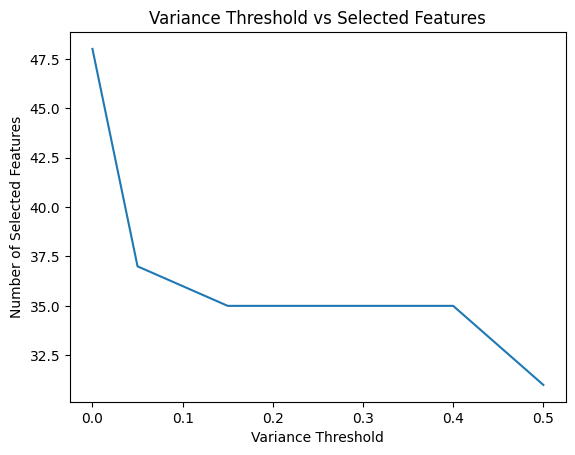

In [ ]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# load the dataset
df = read_csv('oil-spill.csv', header=None)

# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)

results = []
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)

# 🔵 plot AFTER loop
pyplot.plot(thresholds, results)
pyplot.xlabel('Variance Threshold')
pyplot.ylabel('Number of Selected Features')
pyplot.title('Variance Threshold vs Selected Features')
pyplot.show()

## Identify Rows that Contain Duplicate Data

* Another experiment might involve augmenting the dataset with different numbers of randomly selected duplicate examples.
* The Pandas function duplicated() will report whether a given row is duplicated or not. All rows are marked as either False to indicate that it is not a duplicate or True to indicate that it is a duplicate.
* If there are duplicates, the first occurrence of the row is marked False (by default), as we might expect.


In [ ]:
# locate rows of duplicate data
from pandas import read_csv

# load the dataset
df = read_csv('iris.csv', header=None)

# calculate duplicates
dups = df.duplicated()

# report if there are any duplicates
print(dups.any())

# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


## Delete Rows That Contain Duplicate Data

* Rows of duplicate data should probably be deleted from your dataset prior to modeling.
* There are many ways to achieve this, although Pandas provides the drop duplicates() function that achieves exactly this. The example below demonstrates deleting duplicate rows from a dataset.


In [ ]:
print(df.shape)

(150, 5)


There are many ways to achieve this, although Pandas provides the drop duplicates() function that achieves exactly this. The example below demonstrates deleting duplicate rows from a dataset.

In [ ]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(147, 5)


# Outlier Identfication and Removal

* That an outlier is an unlikely observation in a dataset and may have one of many causes.
* How to use simple univariate statistics like standard deviation and interquartile range to identify and remove outliers from a data sample.
* How to use an outlier detection model to identify and remove rows from a training dataset in order to lift predictive modeling performance.

## Test Dataset



* We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.
* The pseudorandom number generator is seeded to ensure that we get the same sample of numbers each time the code is run.


In [ ]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


## Standard Deviation Method



* Let's make this concrete with a worked example. Sometimes, the data is standardized first (e.g. to a Z-score with zero mean and unit variance) so that the outlier detection can be performed using standard Z-score cut-off values.
* This is a convenience and is not required in general, and we will perform the calculations in the original scale of the data here to make things clear.
* We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.



In [ ]:
#identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# calculate summary statistics
data_mean, data_std = mean(data), std(data)

# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


In [ ]:
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9971


## Interquartile Range Method

* The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile
* The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or far outs when described in the context of box and whisker plots.

In [ ]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


## Automatic Outlier Detection

* A simple approach to identifying outliers is to locate those examples that are far from the other examples in the multi-dimensional feature space.
* This can work well for feature spaces
with low dimensionality (few features), although it can become less reliable as the number of
features is increased, referred to as the curse of dimensionality.



In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split

# load the dataset
df = read_csv('housing.csv', header=None)

# retrieve the array
data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


* Next, we can try removing outliers from the training dataset. The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the
problem, and that removing these outliers from the training set will allow a more e ective model to be learned.
* We can achieve this by defining the Local OutlierFactor model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1).
* We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specfics of your dataset.





In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

In [ ]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(305, 13) (305,)


In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.356


* Firstly, we can see that the number of examples in the training dataset has been reduced from 339 to 305, meaning 34 rows containing outliers were identified and deleted.
* We can also see a reduction in MAE from about 3.417 by a model fit on the entire training dataset, to about
3.356 on a model fit on the dataset with outliers removed.

# How to Mark and Remove Missing Data



* How to mark invalid or corrupt values as missing in your dataset.
* How to confirm that the presence of marked missing values causes problems for learning algorithms.
* How to remove rows with missing data from your dataset and evaluate a learning algorithm on the transformed dataset.



## Mark Missing Values

In this section, we will look at how we can identify and mark values as missing. We can use
plots and summary statistics to help identify missing or corrupt data.

In [ ]:
# load and summarize the dataset
from pandas import read_csv

# load the dataset
dataset = read_csv('indians-diabetes.csv', header=None)

# summarize the dataset
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [ ]:
# summarize the first 20 rows of data
print(dataset.head(20))

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


We can get a count of the number of missing values on each of these columns. We can do this by marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

In [ ]:
# count the number of missing values for each column
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()

# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [ ]:
from numpy import nan

# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)

# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [ ]:
# summarize the first 20 rows of data
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

## Remove Rows With Missing Values

In [ ]:
# drop rows with missing values
dataset.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print(dataset.shape)

(392, 9)


# How to Use Statistical Imputation



* Missing values must be marked with NaN values and can be replaced with statistical measures to calculate the column of values.
* How to load a CSV file with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
* How to impute missing values with statistics as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.



In [ ]:
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# summarize the first few rows
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [ ]:
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
  # count number of rows with missing values
  n_miss = dataframe[[i]].isnull().sum()
  perc = n_miss / dataframe.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


/tmp/ipython-input-4001878281.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-4001878281.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-4001878281.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-4001878281.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
/tmp/ipython-input-4001878281.py:6: FutureWarning: Calling i

## Statistical Imputation With SimpleImputer

The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation. In this section, we will explore how to effectively use the SimpleImputer class.

In [ ]:
from numpy import isnan
from sklearn.impute import SimpleImputer

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [ ]:
# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


## SimpleImputer and Model Evaluation

To correctly apply statistical missing data imputation and avoid data leakage, it is required that the statistics calculated for each column are calculated on the training dataset
only, then applied to the train and test sets for each fold in the dataset.

In [ ]:
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.871 (0.051)


## Comparing Different Imputed Statistics

* We can design an experiment to test each statistical strategy and discover what works best for this dataset, comparing the mean, median, mode (most frequent), and constant (0) strategies.
* The mean accuracy of each approach
can then be compared. The complete example is listed below.



>mean 0.866 (0.050)
>median 0.873 (0.056)
>most_frequent 0.869 (0.060)
>constant 0.870 (0.054)


/tmp/ipython-input-2320132382.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=strategies, showmeans=True)


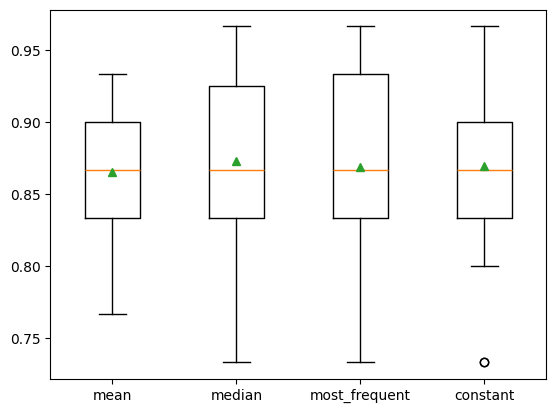

In [ ]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']

for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m',
  RandomForestClassifier())])

  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

# How to Use KNN Imputation

* Missing values must be marked with NaN values and can be replaced with nearest neighbor estimated values.
* How to load a CSV file with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
* How to impute missing values with nearest neighbor models as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.



## k-Nearest Neighbor Imputation



* The use of a KNN model to predict or fill missing values is referred to as Nearest Neighbor Imputation or KNN imputation.
* Configuration of KNN imputation often involves selecting the distance measure (e.g. Euclidean) and the number of contributing neighbors for each prediction, the k hyperparameter of the KNN algorithm.

In [ ]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [ ]:
# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


## KNNImputer and Model Evaluation

In [ ]:
# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.866 (0.058)


## KNNImputer and Different Number of Neighbors



* The key hyperparameter for the KNN algorithm is k; that controls the number of nearest neighbors that are used to contribute to a prediction.
* It is good practice to test a suite of different values for k. The example below evaluates model pipelines and compares odd values for k from 1 to 21.


>1 0.859 (0.052)
>3 0.861 (0.056)
>5 0.863 (0.054)
>7 0.866 (0.053)
>9 0.860 (0.049)
>15 0.867 (0.054)
>18 0.864 (0.060)
>21 0.864 (0.056)


/tmp/ipython-input-978674415.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=strategies, showmeans=True)


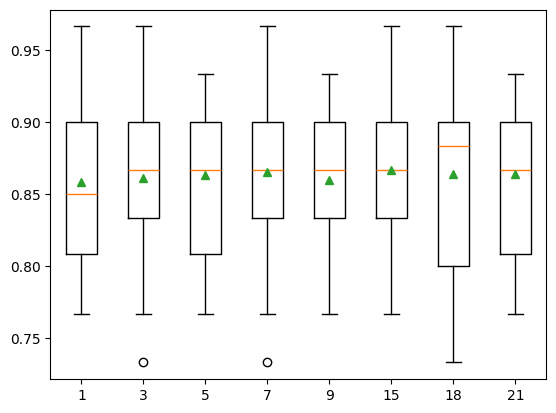

In [ ]:
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m',
  RandomForestClassifier())])

  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

# How to Use Iterative Imputation



* Missing values must be marked with NaN values and can be replaced with iteratively estimated values.
* How to load a CSV value with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
* How to impute missing values with iterative models as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.



## Iterative Imputation With IterativeImputer

In [ ]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [ ]:
# define imputer
imputer = IterativeImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


## IterativeImputer and Model Evaluation

In [ ]:
# evaluate iterative imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.874 (0.052)


## IterativeImputer and Different Imputation Order

>ascending 0.873 (0.053)
>descending 0.871 (0.056)
>roman 0.876 (0.052)
>arabic 0.869 (0.056)
>random 0.871 (0.057)


/tmp/ipython-input-24778959.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=strategies, showmeans=True)


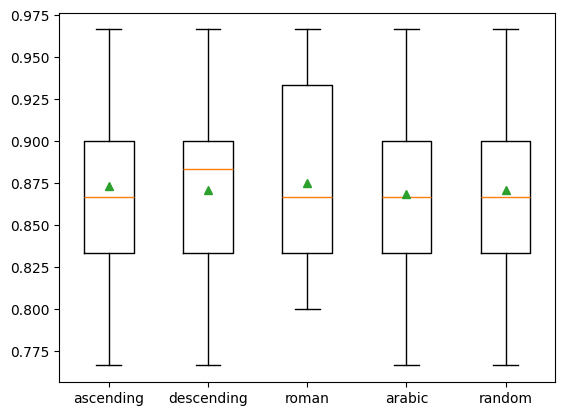

In [ ]:
# compare iterative imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])

  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

## IterativeImputer and Different Number of Iterations

>1 0.870 (0.057)
>2 0.878 (0.050)
>3 0.874 (0.051)
>4 0.878 (0.050)
>5 0.868 (0.053)
>6 0.873 (0.050)
>7 0.870 (0.054)
>8 0.870 (0.051)
>9 0.873 (0.055)
>10 0.864 (0.054)
>11 0.879 (0.052)
>12 0.873 (0.050)
>13 0.874 (0.057)
>14 0.870 (0.049)
>15 0.868 (0.055)
>16 0.871 (0.050)
>17 0.867 (0.052)
>18 0.872 (0.052)
>19 0.874 (0.051)
>20 0.870 (0.048)


/tmp/ipython-input-1886778854.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=strategies, showmeans=True)


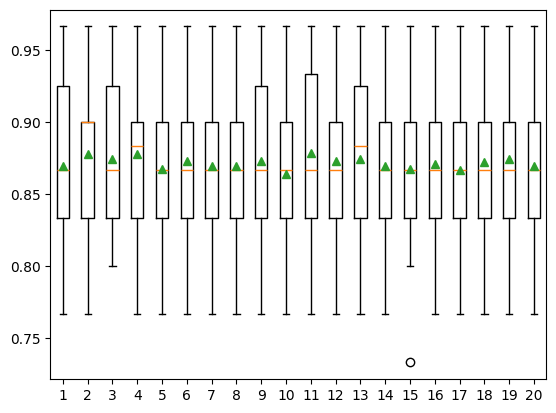

In [ ]:
# compare iterative imputation number of iterations for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]

for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m',
  RandomForestClassifier())])

  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()